In [1]:
pip install numpy psutil matplotlib

In [5]:
import numpy as np
import time
import multiprocessing
import psutil
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
def multiply_matrices(n, num_threads):
    constant_matrix = np.random.rand(n, n)
    random_matrices = [np.random.rand(n, n) for _ in range(100)]

    if num_threads > 1:
        os.environ["NUMEXPR_NUM_THREADS"] = str(num_threads)
        os.environ["OMP_NUM_THREADS"] = str(num_threads)

    start_time = time.time()
    result_matrices = [np.matmul(constant_matrix, mat) for mat in random_matrices]
    end_time = time.time()
    time_taken = end_time - start_time

    return time_taken

if __name__ == "__main__":
    n = 1000
    num_threads_list = [1, 2, 3, 4, 5, 6, 7, 8]
    time_taken_list = []
    cpu_usage_list = []

    for num_threads in num_threads_list:
        process = psutil.Process()
        start_cpu_usage = process.cpu_percent()

        time_taken = multiply_matrices(n, num_threads)
        time_taken_list.append(time_taken)

        end_cpu_usage = process.cpu_percent()
        cpu_usage_list.append(end_cpu_usage - start_cpu_usage)

        print(f"Threads T={num_threads}: CPU Usage: {end_cpu_usage - start_cpu_usage}%")



Threads T=1: CPU Usage: 113.9%
Threads T=2: CPU Usage: 99.0%
Threads T=3: CPU Usage: 154.6%
Threads T=4: CPU Usage: 155.2%
Threads T=5: CPU Usage: 162.4%
Threads T=6: CPU Usage: 155.4%
Threads T=7: CPU Usage: 179.5%
Threads T=8: CPU Usage: 162.0%


In [6]:
# Create time vs thread table
data = {
    "Threads": num_threads_list,
    "Time Taken (seconds)": time_taken_list
}
time_df = pd.DataFrame(data)

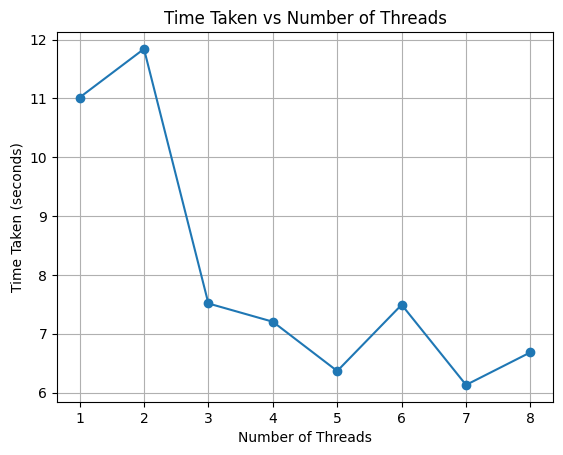

In [7]:

# Plot time vs thread
plt.plot(num_threads_list, time_taken_list, marker='o')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken vs Number of Threads')
plt.grid(True)
plt.show()


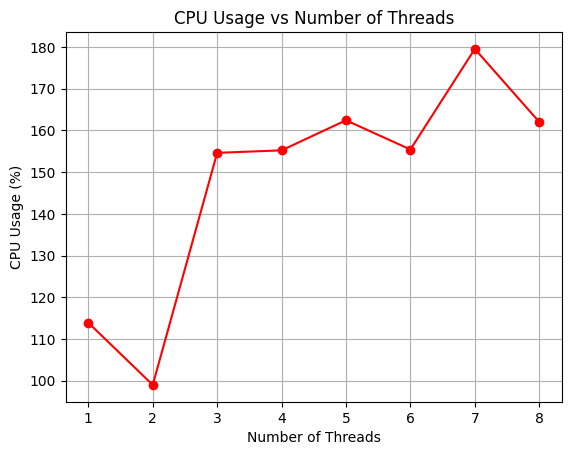

In [8]:
# Plot CPU usage vs thread
plt.plot(num_threads_list, cpu_usage_list, marker='o', color='r')
plt.xlabel('Number of Threads')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage vs Number of Threads')
plt.grid(True)
plt.show()


In [9]:
# Display time vs thread table
print("\nTime vs Number of Threads Table:\n")
print(time_df)



Time vs Number of Threads Table:

   Threads  Time Taken (seconds)
0        1             11.013950
1        2             11.840018
2        3              7.515277
3        4              7.204762
4        5              6.367357
5        6              7.493275
6        7              6.131145
7        8              6.685292
